# Le pendule

!["Schema du Pendule"](SchemaPendule.png)

## Approximation des petits angles

On considère le pendule simple de la figure ci-dessus, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

Résolvez cette équation linéarisée ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et tracez **sur un même graphe** l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

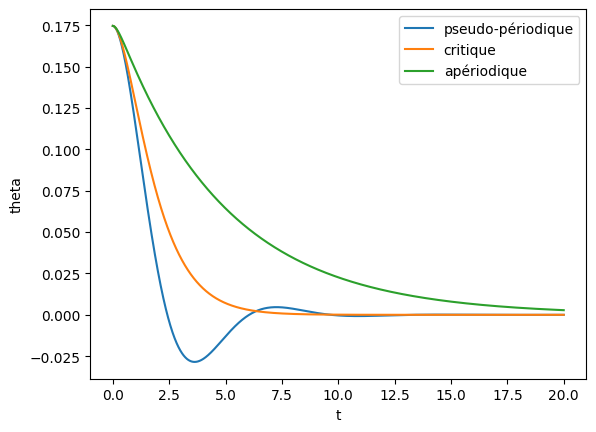

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#j'ai un peu changé par rapport à la correction des exos, avec un "args" pour passer les paramètres de la fonction en argument
# (au lieu de juste redéfinir q et omega juste avant l'appel à rk4)
# j'ai aussi inversé t et v dans la fonction derivee pour être compatible avec solve_ivp de scipy.integrate
# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, args):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(t[i], v[:, i], *args )
        d2 = derivee(t[i] + step / 2, v[:, i] + step / 2 * d1, *args )
        d3 = derivee(t[i] + step / 2, v[:, i] + step / 2 * d2, *args)
        d4 = derivee(t[i] + step, v[:, i] + step * d3, *args )
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

#fonction dérivée du système
def PenduleAppr(t, v, Omega, q):
    '''
        fonction dérivée pendule simple approximation des petits angles
    '''
    theta,dtheta=v    
    ddtheta=-q*dtheta-Omega**2*theta
    return np.array([dtheta,ddtheta])

#paramètres
Omega=1 #rad/s
qliste=[1,2,5] #s-1
labels=["pseudo-périodique","critique","apériodique"]
#Conditions initiales
theta0=np.radians(10)
dtheta0=0
for i,q in enumerate(qliste):
    t,v=rk4(0,20,0.01,[theta0,dtheta0],PenduleAppr,ordre=2,args=[Omega,q])
    plt.plot(t,v[0,:],label=labels[i])
plt.legend()
plt.xlabel("t")
plt.ylabel("theta")
plt.show()

## Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Résolvez cette nouvelle équation avec la méthode RK4 pour une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.

Tracez **sur un même graphe** la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Commentez la forme des trajectoires que vous observez.

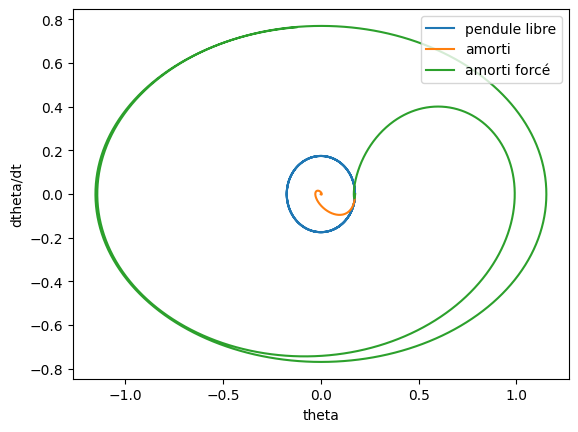

In [2]:
def PenduleApprForced(t,v,Omega,q,OmegaE,AmplE):
    '''
        fonction dérivée pendule simple approximation des petits angles
        avec force d'excitation sinusoidale
    '''
    theta,dtheta=v    
    ddtheta=-q*dtheta-Omega**2*theta+AmplE*np.sin(OmegaE*t)
    return np.array([dtheta,ddtheta])

#Paramètres
Omega=1 #rad/s
OmegaE=2*Omega/3

qFe=[[0,0,"pendule libre"],
     [1,0,"amorti"],
     [1,1,"amorti forcé"]] 

#Conditions initiales
theta0=np.radians(10)
dtheta0=0

for i in range(len(qFe)):
    q,Fe,labs=qFe[i]
    t,v=rk4(0,20,0.01,[theta0,dtheta0],PenduleApprForced,ordre=2,args=[Omega,q,OmegaE,Fe])
    plt.plot(v[0,:],v[1,:],label=labs)
plt.legend()
plt.xlabel("theta")
plt.ylabel("dtheta/dt")
plt.show()

## Mouvement chaotique

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

Résolvez l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Tracez $\theta(t)$ sur un temps de $100\mathrm{~s}$.

Ajoutez deux tests `if` dans la boucle après l'appel à rk4 pour maintenir l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$.

Que constatez-vous au sujet de la période du pendule ? (Attention, périodique $\neq$ sinusoïdal...)

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

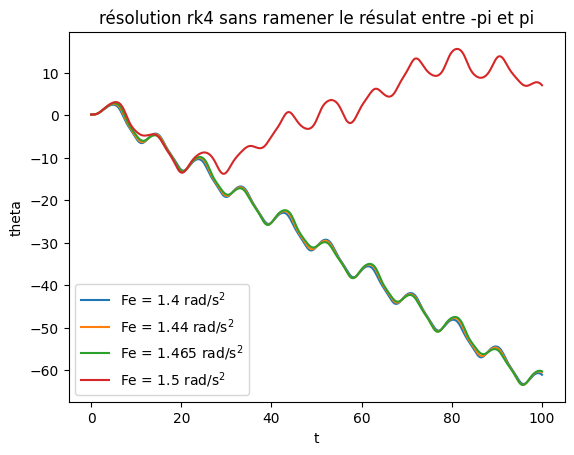

In [3]:
def PenduleForced(t,v,Omega,q,OmegaE,AmplE):
    '''
        fonction dérivée pendule simple sans approximation
        avec force d'excitation sinusoidale
    '''
    theta,dtheta=v    
    ddtheta=-q*dtheta-Omega**2*np.sin(theta)+AmplE*np.sin(OmegaE*t)
    return np.array([dtheta,ddtheta])

#Paramètres
Omega=1 #rad/s
OmegaE=2*Omega/3
q=0.5 #s-1
FeL=[1.4,1.44,1.465,1.5] #rad/s

#Conditions initiales
theta0=np.radians(10)
dtheta0=0

for i in range(len(FeL)):
    Fe=FeL[i]
    t,v=rk4(0,100,0.01,[theta0,dtheta0],PenduleForced,ordre=2,args=[Omega,q,OmegaE,Fe])
    plt.plot(t,v[0,:],label="Fe = "+str(Fe)+" rad/s$^2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("theta")
plt.title("résolution rk4 sans ramener le résulat entre -pi et pi")
plt.show()

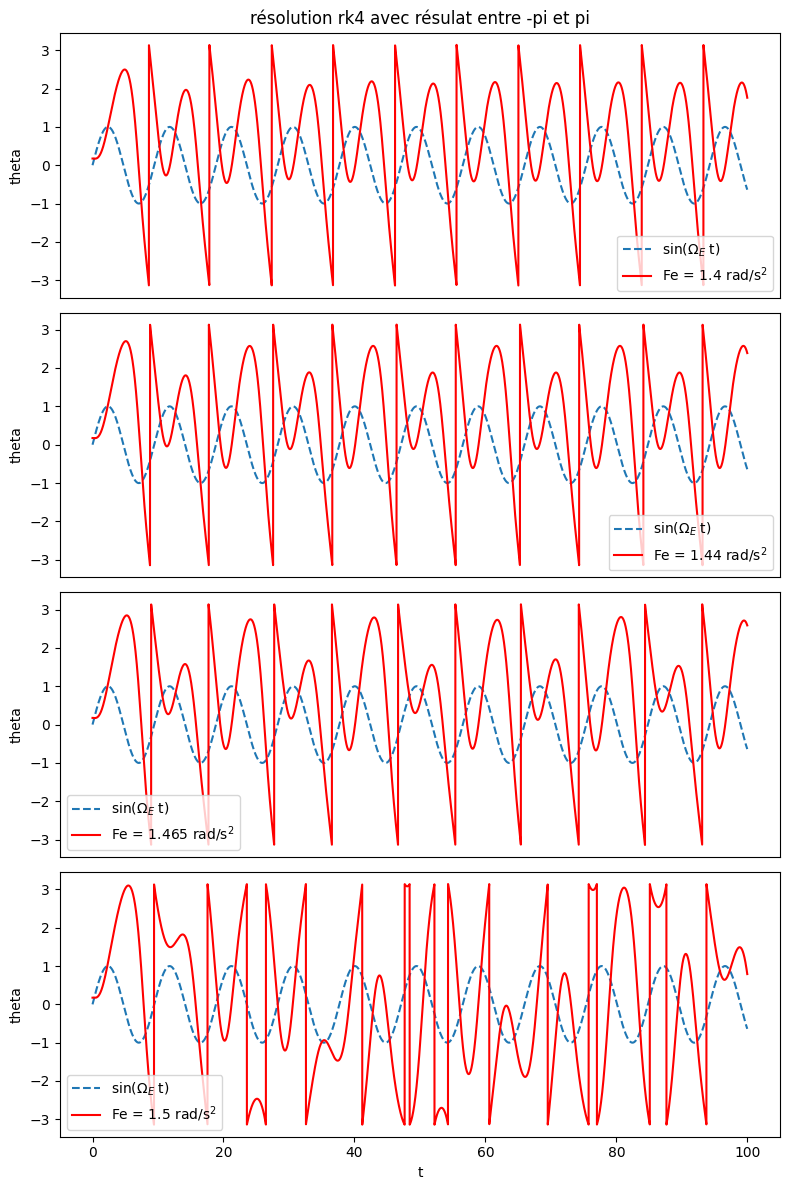

In [4]:
# Avec angle compris entre -pi et pi

#Paramètres
Omega=1 #rad/s
OmegaE=2*Omega/3
q=0.5 #s-1
FeL=[1.4,1.44,1.465,1.5] #rad/s

#Conditions initiales
theta0=np.radians(10)
dtheta0=0

fig, axs=plt.subplots(4,1,figsize=(8,12))
axs[0].set_title("résolution rk4 avec résulat entre -pi et pi")
for i in range(len(FeL)):
    Fe=FeL[i]
    t,v=rk4(0,100,0.01,[theta0,dtheta0],PenduleForced,ordre=2,args=[Omega,q,OmegaE,Fe])
    #solution sans double boucle if
    angle=(v[0,:]+np.pi)%(2*np.pi)-np.pi
    
    axs[i].plot(t,np.sin(OmegaE*t),'--',label='sin($\Omega_E$ t)')# pour regarder la périodicité
    axs[i].plot(t,angle,'r',label="Fe = "+str(Fe)+" rad/s$^2$")    
    axs[i].legend()
    axs[i].set_ylabel("theta")
    if i<3:
        axs[i].set_xticks([])
plt.xlabel("t")
plt.tight_layout()
plt.show()

Comportement apparent de la période (par comparaison avec $\sin(\Omega_E t)$ ) :
- Fe = 1.4 rad/s : $T=2\pi/\Omega_E$
- Fe = 1.44 rad/s : $T=4\pi/\Omega_E$
- Fe = 1.465 rad/s : $T=4\pi/\Omega_E$
- Fe = 1.5 rad/s : non périodique

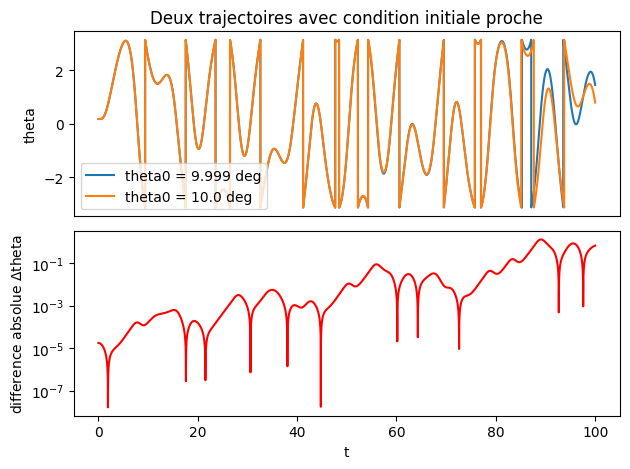

In [5]:
#cas chaotique Fe=1.5 rad/s

#Paramètres
Omega=1 #rad/s
OmegaE=2*Omega/3
q=0.5 #s-1
Fe=1.5 #rad/s

#Conditions initiales
theta0L=[np.radians(9.999),np.radians(10)]
dtheta0=0

plt.subplot(2,1,1)
plt.title("Deux trajectoires avec condition initiale proche")
theta0=theta0L[0]
t,v0=rk4(0,100,0.01,[theta0,dtheta0],PenduleForced,ordre=2,args=[Omega,q,OmegaE,Fe])
#solution sans double boucle if
angle=(v0[0,:]+np.pi)%(2*np.pi)-np.pi

plt.plot(t,angle,label="theta0 = "+str((theta0)*180/np.pi)+" deg")
theta0=theta0L[1]
t,v1=rk4(0,100,0.01,[theta0,dtheta0],PenduleForced,ordre=2,args=[Omega,q,OmegaE,Fe])
#solution sans double boucle if
angle=(v1[0,:]+np.pi)%(2*np.pi)-np.pi

plt.plot(t,angle,label="theta0 = "+str((theta0)*180/np.pi)+" deg")

plt.legend()
plt.ylabel("theta")
plt.xticks([])

plt.subplot(2,1,2)
plt.semilogy(t,np.abs(v0[0,:]-v1[0,:]),'r') #on travaille sur les angles 'bruts' et non ramenés entre -pi et pi
plt.ylabel("difference absolue $\Delta$theta")

plt.xlabel("t")
plt.tight_layout()
plt.show()